## _kNN_: _k_-Vecinos Cercanos

Es un algoritmo de aprendizaje supervisado en el que se asigna a un punto de prueba, la clase mayoritaria entre los _k_ vecinos más próximos, utilizando una métrica de distancia. En la siguiente figura se puede ver un ejemplo para _k_ = 5
<pre>
<center><img src="https://drive.google.com/uc?export=view&id=1kGka8wsD27newwU6ew8VUtVwHKBk9GVq" width=800></center>
</pre>

## Métricas de distancia

### Minkowski:$\qquad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = [ \sum\limits_{j=1}^{m}{(|x_j^{[a]}-x_j^{[b]}|)^p} ]^{\frac{1}{p}}$

### Manhattan: $\quad p=1 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) =  \sum\limits_{j=1}^{m}{|x_j^{[a]}-x_j^{[b]}|}$

### Euclídea: $\quad p=2 \quad d(\textbf{x}^{[a]}, \textbf{x}^{[b]}) = \sqrt{ \sum\limits_{j=1}^{m}{(x_j^{[a]}-x_j^{[b]})^2}}$

### A continuación, implementar el algortimo KNN

<center><img src="https://drive.google.com/uc?export=view&id=1ZI14NuMpP-x0mLzLgnyAa0jAjrpmAh1z" width=1200></center>


### Implementación de una Clase KNN

In [1]:
import numpy as np
import pandas as pd
from collections import Counter
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
df_iris = load_iris(as_frame=True).frame
X = df_iris[ ['petal length (cm)', 'petal width (cm)'] ]
y = df_iris.target

In [3]:
print('Class labels:', np.unique(y))

Class labels: [0 1 2]


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, random_state=1,  stratify = y)

In [5]:
# Normalización de los datos
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X_train)                     
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test) 

In [6]:
from collections import Counter
class KNN:
    """Clasificador KNN.
    
    Parámetros
    ------------
    k : int
        número de vecinos cercanos
    p : int
        valor para selección de métrica (1: Manhattan, 2: Euclídea)
    """
    
    def __init__(self, k=3, p=2):
        self.k = k
        self.p = p
        
    def distancia(self, vec_1, vec_2, p=2):
        dim = len(vec_1)
        distance=0
        
        for d in range(dim):
            distance += (abs(vec_1[d]-vec_2[d]))**p
    
        distance = (distance)**(1/p)
        return distance
        
    def fit(self, X, y):
        """Entrenamiento del clasificador kNN, es un algoritmo 'perezoso'
        sólo almacena los datos y sus etiquetas
        Parameters
        ----------
        X : array
            vector de características.
        y : array
            clases asociadas a los datos.
        """
        self.X = X
        self.y = y
        self.n_datos = X.shape[0]
        
    def predict(self, x):
        """Función que realiza la predicción.
        Parameters
        ----------
        x : array
            vector de patrones de entrada.

        Returns
        -------
        vector de predicciones.
        """
        
        y_pred = []
        #------------------------------------------------
        for elemento in x:
          etiquetasVecinas = []
          distancias = []
          etiquetas = []

          for valor, etiqueta in zip(self.X, self.y):
            distancias.append(self.distancia(elemento, valor))
            etiquetas.append(etiqueta)
          
          df_distancias = pd.DataFrame({
              "target" : etiquetas,
              "distancias" : distancias})
          df_distancias.sort_values(by=['distancias'],inplace=True)
          aClasificar = df_distancias.head(self.k)
          y_pred.append(aClasificar["target"].value_counts().idxmax())

          




        #------------------------------------------------
        return np.asarray(y_pred)

knn = KNN()
tiene que devolver un arrar con las predicciones

## Usar el clasificador implementado

In [7]:
# Creamos un objeto knn usando nuestra clase
knn = KNN(k=3)
# llamamos al método de entrenamiento ---> Datos de entrenamiento
knn.fit(X_train_std, y_train)
# Hacemos la predicción con los datos de prueba
y_pred = knn.predict(X_test_std)
y_pred

array([2, 0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 0, 1, 0, 1, 2, 1, 1, 2, 2, 0,
       1, 2, 1, 1, 1, 2, 0, 2, 0, 0, 1, 1, 2, 2, 0, 0, 0, 1, 2, 2, 1, 0,
       0])

In [13]:
# Comparamos nuestra predicción con los targets
y_ = np.vstack((y_pred, y_test))
print(y_)
print((y_pred==y_test).all())    

[[2 0 0 1 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2
  0 0 0 1 2 2 1 0 0]
 [2 0 0 2 1 1 2 1 2 0 0 2 0 1 0 1 2 1 1 2 2 0 1 2 1 1 1 2 0 2 0 0 1 1 2 2
  0 0 0 1 2 2 1 0 0]]
False


In [9]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def plot_decision_regions(X, y, clasificador, test_idx=None, resolution=0.02):
    
    # setup marker generator and color map
    markers = ('s', 'o', '^', 'v', 'x')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1

    
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    
    Z = clasificador.predict(np.array([xx1.ravel(), xx2.ravel()]).T)

    Z = Z.reshape(xx1.shape)

    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=cl, 
                    edgecolor='black')

    # highlight test samples
    if test_idx:
        # plot all samples
        X_test, y_test = X[test_idx, :], y[test_idx]

        plt.scatter(X_test[:, 0],
                    X_test[:, 1],
                    c="None",
                    edgecolor='black',
                    alpha=1,
                    linewidth=1,
                    marker='o',
                    s=100, 
                    label='test set')

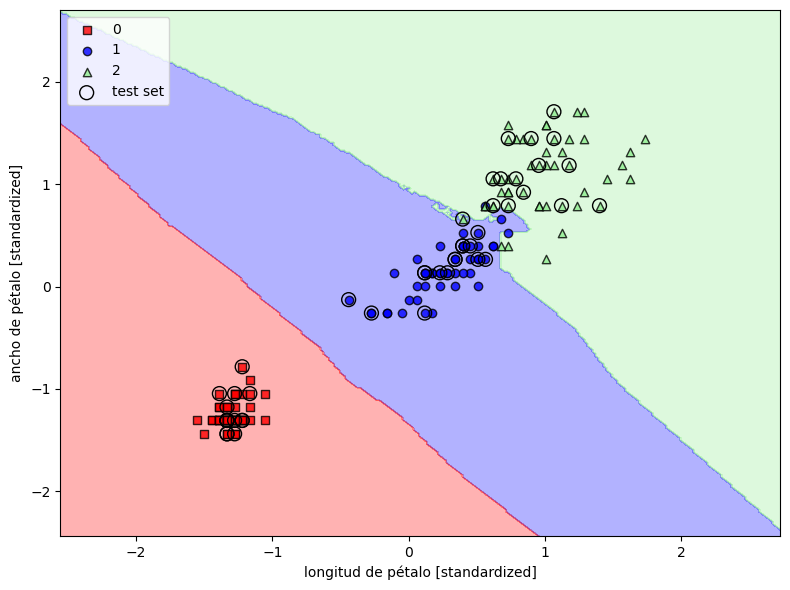

In [10]:
X_combined_std = np.vstack((X_train_std, X_test_std))
y_combined = np.hstack((y_train, y_test))
plt.figure(figsize=(8,6))
plot_decision_regions( X=X_combined_std, y=y_combined, clasificador=knn, test_idx=range(105, 150))
plt.xlabel('longitud de pétalo [standardized]')
plt.ylabel('ancho de pétalo [standardized]')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

In [14]:

y_pred = knn.predict(X_test_std)

In [15]:
def accuracy(y_pred, y_test):
    return np.sum( np.equal(y_pred, y_test) ) / len(y_test)

print(accuracy(y_pred, y_test))


0.9777777777777777
